>**Problem Statement:** An online question and answer platform has hired you as a data scientist to identify the best question authors on the platform. This identification will bring more insight into increasing the user engagement. Given the tag of the question, number of views received, number of answers, username and reputation of the question author, the problem requires you to predict the upvote count that the question will receive.

# With log transformation

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, PReLU, ELU, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [2]:
df_train = pd.read_csv("train_NIR5Yl1.csv")
df_test = pd.read_csv("test_8i3B3FC.csv")

In [3]:
# df_train.Upvotes.plot(kind='kde')

In [4]:
# independent variables
# df_train.Reputation.plot(kind='kde')

In [5]:
df_train.columns

# it seems it has too many values out side the box

Index(['ID', 'Tag', 'Reputation', 'Answers', 'Username', 'Views', 'Upvotes'], dtype='object')

### Applying log transformation on skewed data

In [6]:
mm = MinMaxScaler()

In [7]:
df_train.Reputation = mm.fit_transform(df_train[['Reputation']])
df_test.Reputation = mm.transform(df_test[['Reputation']])

In [8]:
df_train.Views = mm.fit_transform(df_train[['Views']])
df_test.Views = mm.transform(df_test[['Views']])

In [9]:
df_train.Answers = mm.fit_transform(df_train[['Answers']])
df_test.Answers = mm.transform(df_test[['Answers']])

In [10]:
df_train.Reputation = np.log1p(df_train.Reputation)
df_test.Reputation = np.log1p(df_test.Reputation)

In [11]:
df_train.Answers = np.log1p(df_train.Answers)
df_test.Answers = np.log1p(df_test.Answers)

In [12]:
df_train.Views = np.log1p(df_train.Views)
df_test.Views = np.log1p(df_test.Views)

In [13]:
df_train.Upvotes = np.log1p(df_train.Upvotes)

### After transformation

In [14]:
# df_train.Reputation.plot(kind='kde')

In [15]:
df_train.drop(columns=['Username','ID'], inplace=True)
df_test.drop(columns=['Username','ID'],inplace=True)

In [16]:
df_train = pd.get_dummies(df_train, columns=['Tag'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['Tag'], drop_first=True)

In [17]:
X = df_train.drop(columns=['Upvotes'])
y = df_train.Upvotes

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
X_train.shape

(264036, 12)

In [50]:
early_stop = EarlyStopping( monitor='val_loss',verbose=1, patience=30)

In [52]:
ann = Sequential()

ann.add(Dense(units=50,  activation='relu', input_dim = 12))

ann.add(Dense(units=25, activation='relu',kernel_regularizer=regularizers.l2(0.01)))

ann.add(Dense(units=50, activation='relu',kernel_regularizer=regularizers.l2(0.01)))

ann.add(Dense(units=1))

ann.compile(loss='mean_squared_error', optimizer= 'Adam', metrics=['mse'])



ann.fit(X_train,y_train,epochs= 200, validation_data=(X_test,y_test), batch_size=100,callbacks=[early_stop])


Epoch 1/200
2641/2641 [==============================] - 9s 3ms/step - loss: 3.4736 - mse: 3.1152 - val_loss: 1.3701 - val_mse: 1.1424
Epoch 2/200
2641/2641 [==============================] - 9s 4ms/step - loss: 1.2575 - mse: 1.0605 - val_loss: 1.1017 - val_mse: 0.9584
Epoch 3/200
2641/2641 [==============================] - 10s 4ms/step - loss: 1.1162 - mse: 0.9797 - val_loss: 1.0073 - val_mse: 0.8843
Epoch 4/200
2641/2641 [==============================] - 10s 4ms/step - loss: 1.0100 - mse: 0.8882 - val_loss: 0.8939 - val_mse: 0.7765
Epoch 5/200
2641/2641 [==============================] - 10s 4ms/step - loss: 0.9039 - mse: 0.7879 - val_loss: 0.8308 - val_mse: 0.7189
Epoch 6/200
2641/2641 [==============================] - 11s 4ms/step - loss: 0.8503 - mse: 0.7423 - val_loss: 0.7782 - val_mse: 0.6751
Epoch 7/200
2641/2641 [==============================] - 11s 4ms/step - loss: 0.8073 - mse: 0.7063 - val_loss: 0.7538 - val_mse: 0.6574
Epoch 8/200
2641/2641 [===========================

Epoch 61/200
2641/2641 [==============================] - 11s 4ms/step - loss: 0.5954 - mse: 0.5695 - val_loss: 0.5932 - val_mse: 0.5672
Epoch 62/200
2641/2641 [==============================] - 11s 4ms/step - loss: 0.6005 - mse: 0.5749 - val_loss: 0.5748 - val_mse: 0.5489
Epoch 63/200
2641/2641 [==============================] - 12s 4ms/step - loss: 0.5973 - mse: 0.5718 - val_loss: 0.5736 - val_mse: 0.5484
Epoch 64/200
2641/2641 [==============================] - 13s 5ms/step - loss: 0.5938 - mse: 0.5685 - val_loss: 0.5779 - val_mse: 0.5530
Epoch 65/200
2641/2641 [==============================] - 12s 5ms/step - loss: 0.5952 - mse: 0.5701 - val_loss: 0.5748 - val_mse: 0.5496
Epoch 66/200
2641/2641 [==============================] - 12s 4ms/step - loss: 0.5923 - mse: 0.5671 - val_loss: 0.5785 - val_mse: 0.5535
Epoch 67/200
2641/2641 [==============================] - 12s 5ms/step - loss: 0.5945 - mse: 0.5694 - val_loss: 0.5728 - val_mse: 0.5484
Epoch 68/200
2641/2641 [=================

2641/2641 [==============================] - 14s 5ms/step - loss: 0.5782 - mse: 0.5597 - val_loss: 0.5564 - val_mse: 0.5378
Epoch 121/200
2641/2641 [==============================] - 11s 4ms/step - loss: 0.5803 - mse: 0.5619 - val_loss: 0.5573 - val_mse: 0.5393
Epoch 122/200
2641/2641 [==============================] - 12s 4ms/step - loss: 0.5778 - mse: 0.5597 - val_loss: 0.5646 - val_mse: 0.5462
Epoch 123/200
2641/2641 [==============================] - 13s 5ms/step - loss: 0.5793 - mse: 0.5610 - val_loss: 0.5581 - val_mse: 0.5403
Epoch 124/200
2641/2641 [==============================] - 14s 5ms/step - loss: 0.5810 - mse: 0.5631 - val_loss: 0.5593 - val_mse: 0.5412
Epoch 125/200
2641/2641 [==============================] - 18s 7ms/step - loss: 0.5811 - mse: 0.5629 - val_loss: 0.5561 - val_mse: 0.5379
Epoch 126/200
2641/2641 [==============================] - 20s 7ms/step - loss: 0.5813 - mse: 0.5632 - val_loss: 0.5705 - val_mse: 0.5523
Epoch 127/200
2641/2641 [=======================

2641/2641 [==============================] - 19s 7ms/step - loss: 0.5751 - mse: 0.5599 - val_loss: 0.5655 - val_mse: 0.5503
Epoch 180/200
2641/2641 [==============================] - 17s 6ms/step - loss: 0.5780 - mse: 0.5628 - val_loss: 0.5611 - val_mse: 0.5463
Epoch 181/200
2641/2641 [==============================] - 15s 6ms/step - loss: 0.5789 - mse: 0.5637 - val_loss: 0.5521 - val_mse: 0.5374
Epoch 182/200
2641/2641 [==============================] - 13s 5ms/step - loss: 0.5734 - mse: 0.5582 - val_loss: 0.5505 - val_mse: 0.5357
Epoch 183/200
2641/2641 [==============================] - 15s 6ms/step - loss: 0.5739 - mse: 0.5589 - val_loss: 0.5639 - val_mse: 0.5490
Epoch 184/200
2641/2641 [==============================] - 16s 6ms/step - loss: 0.5691 - mse: 0.5541 - val_loss: 0.5541 - val_mse: 0.5389
Epoch 185/200
2641/2641 [==============================] - 20s 7ms/step - loss: 0.5728 - mse: 0.5577 - val_loss: 0.5550 - val_mse: 0.5403
Epoch 186/200
2641/2641 [=======================

<AxesSubplot:>

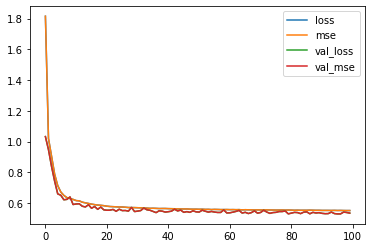

In [32]:
pd.DataFrame(ann.history.history).plot()

<AxesSubplot:>

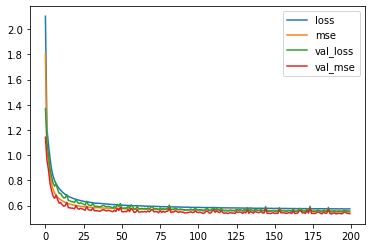

In [53]:
pd.DataFrame(ann.history.history).plot()

In [54]:
y_pred = ann.predict(X_test)

In [55]:
r2_score(y_test,y_pred)

0.8420718861758804

In [56]:
mean_squared_error(y_test,y_pred)

0.536024298217391

In [57]:
df_pred = ann.predict(df_test)

In [58]:
df_pred = np.expm1(df_pred)

In [59]:
df_final= pd.DataFrame([pd.read_csv("test_8i3B3FC.csv")['ID'],df_pred.ravel()])
df_final=df_final.T
df_final.columns = ['ID','Upvotes']
df_final.to_csv('./results/ann_results.csv',index=False)